In [ ]:
## IBM Applied Data Science Final Capstone Project

For this final capstone, I investigate a scenario in which someone is relocating to the county of Arlington, Virginia and wants to know information about cost of living and local venues in different neighborhoods.

Moving to a new area can be daunting, especially one as diverse and established as Arlington, Virginia. The goal of the project is to examine neighborhoods in Arlington, find venues in those neighborhoods such as restaurants, parks, or bars that new residents may want near where they live, and group the neighborhoods into clusters based on their unique venues. An unsupervised machine-learning algorithm creates the clusters of neighborhoods based on the local venue information. The analysis will be done by utilizing the Foursquare API and location data of each neighborhood. In addition to local venue data, the average rent cost will be examined by clusters, so that people researching moving to Arlington can not only make a decision on which neighborhood to move to based on venue data, but also average cost of living. 

To complete this project, the following data is used:
1) List of Neighborhoods in Arlington, Virginia

2) Geo-coordinates of the neighborhoods in Arlington, Virginia

3) Average rent for each neighborhood in Arlington, Virginia

4) The top venues of each neighborhood

The list of neighborhoods and their average rent is obtained from RentCafe, a website where local rent market trends can be determined sorted by neighborhoods (https://www.rentcafe.com/average-rent-market-trends/us/va/arlington/).  

Geolocation data of the neighborhoods is obtained from the geocoder tool. The venue data will be obtained from Foursquare using their API, searching by geolocation. 

Caveats:
1) Some neighborhoods had to be omitted due to lack of data in geolocator

2) The venues in each neighborhood are restricted to a 1000 meter radius search based on the centerpoint of each neighborhood.

3) Each neighborhood is capped out at 100 venues due to restrictions on Foursquare API


**Step 1: Import and install all necessary Libraries and install**

In [1]:
##Import all the things
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         240 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0

The following packages will be UPDATED:

  certifi                          2020.12.5-py36h5fab9bb_0 --> 2020.12.5-py36h5fab9bb_1



geopy-2.1.0          | 64 KB     

In [2]:
pip install lxml

     |████████████████████████████████| 5.5MB 5.0MB/s eta 0:00:01     |█████▉                          | 1.0MB 5.0MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install bs4

     |████████████████████████████████| 122kB 4.2MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [5]:
#import BeautifulSoup command from bs4
from bs4 import BeautifulSoup

**Step 2: Retrieve the data we want from the website and pass it into dataframes**

In [6]:
#retrieve the webpage with the data we want, in this case, the neighborhood and rent data from Arlington, Virginia
#pass the data into the soup variable to breakout the webpage into its html components
arl_rent = requests.get("https://www.rentcafe.com/average-rent-market-trends/us/va/arlington/")

soup = BeautifulSoup(arl_rent.content, 'lxml')


In [7]:
#find the data we are interested in. In this case, the neighborhoods are listed in the 'th' header and the rent is under the 'td' header. Create two lists containing the data

rent_hood = soup.find('table', class_='market-trends market-trends-nhood').find_all('th')
rent_cost = soup.find('table', class_='market-trends market-trends-nhood').find_all('td')
print(rent_cost)

#need to delete the first two data points in the neighborhood set, since they are actually column headers
del rent_hood[0:2]
print(rent_hood)

[<td>$2,264</td>, <td>$2,261</td>, <td>$2,242</td>, <td>$2,216</td>, <td>$2,214</td>, <td>$2,214</td>, <td>$2,160</td>, <td>$2,160</td>, <td>$2,157</td>, <td>$2,157</td>, <td>$2,157</td>, <td>$2,126</td>, <td>$2,126</td>, <td>$2,126</td>, <td>$2,126</td>, <td>$2,126</td>, <td>$2,126</td>, <td>$2,126</td>, <td>$2,126</td>, <td>$2,126</td>, <td>$2,124</td>, <td>$2,124</td>, <td>$2,087</td>, <td>$2,087</td>, <td>$2,087</td>, <td>$2,087</td>, <td>$2,087</td>, <td>$2,087</td>, <td>$2,087</td>, <td>$2,087</td>, <td>$2,087</td>, <td>$2,087</td>, <td>$2,087</td>, <td>$2,087</td>, <td>$2,087</td>, <td>$2,087</td>, <td>$2,087</td>, <td>$2,087</td>, <td>$2,087</td>, <td>$2,087</td>, <td>$2,087</td>, <td>$2,087</td>, <td>$2,070</td>, <td>$2,070</td>, <td>$1,927</td>, <td>$1,927</td>, <td>$1,927</td>, <td>$1,888</td>, <td>$1,769</td>, <td>$1,769</td>, <td>$1,769</td>, <td>$1,769</td>, <td>$1,769</td>, <td>$1,727</td>, <td>$1,727</td>, <td>$1,727</td>, <td>$1,639</td>, <td>$1,639</td>, <td>$1,639</t

In [8]:
#create two dataframes, one to hold the neighborhood names, the other to hold the rent data. Then, take the neighborhood list from above and pass it into the dataframe. Repeat for rent.
hood_data = pd.DataFrame([])
rent_data = pd.DataFrame([])

for element in rent_hood:
    hood_data = hood_data.append(pd.DataFrame({'Neighborhood':element.text}, index=[0]), ignore_index = True)

for element in rent_cost:
    rent_data = rent_data.append(pd.DataFrame({'Average Rent':element.text}, index=[0]), ignore_index = True)

print(hood_data.head())
print(rent_data.head())

                    Neighborhood
0                  North Rosslyn
1                   Williamsburg
2  Arlington - East Falls Church
3                     Buckingham
4                       Bluemont
  Average Rent
0       $2,264
1       $2,261
2       $2,242
3       $2,216
4       $2,214


In [9]:
#combine the two created dataframes into one dataframe, with column one being the neighborhood and the second being the average rent for that neighborhood.
rentals = pd.DataFrame([])

rentals['Neighborhood'] = hood_data['Neighborhood']
rentals['Average Rent'] = rent_data['Average Rent']
rentals.head()

,Neighborhood,Average Rent
0,North Rosslyn,"$2,264"
1,Williamsburg,"$2,261"
2,Arlington - East Falls Church,"$2,242"
3,Buckingham,"$2,216"
4,Bluemont,"$2,214"


In [10]:
#sort alphabetically and reset the index
rentals = rentals.sort_values(by=['Neighborhood'])
rentals = rentals.reset_index(drop=True)
rentals.head()

,Neighborhood,Average Rent
0,Alcova Heights,"$1,639"
1,Arlington - East Falls Church,"$2,242"
2,Arlington Forest,"$1,888"
3,Arlington Heights,"$1,639"
4,Arlington Mill,"$1,639"


In [11]:
## remove the $ and the comma from the average rent column, to later make the average rent a float

rentals['Average Rent'] = rentals['Average Rent'].str[1:].replace({',':''},regex = True)
rentals.head()


,Neighborhood,Average Rent
0,Alcova Heights,1639
1,Arlington - East Falls Church,2242
2,Arlington Forest,1888
3,Arlington Heights,1639
4,Arlington Mill,1639


In [12]:
#data cleanup of some of the dataframe (renaming oddly named neighborhoods)

rentals['Neighborhood'] = rentals['Neighborhood'].replace(['Arlington - East Falls Church'], 'East Falls Church')
rentals['Neighborhood'] = rentals['Neighborhood'].replace(['Tara - Leeway Heights'], 'Tara')
rentals['Neighborhood'] = rentals['Neighborhood'].replace(['Radnor - Fort Myer Heights'], 'Fort Myer Heights')
rentals['Neighborhood'] = rentals['Neighborhood'].replace(['Highland Park - Overlee Knolls'], 'Highland Park')

#drop Ballston - Virginia Square and Clarendon - Courthouse rows and make them their own neighborhoods

rentals = rentals.drop([11,20])

new_hoods = pd.DataFrame({"Neighborhood": ['Ballston', 'Clarendon', 'Courthouse', 'Virginia Square'],
                         "Average Rent": ['2160', '2126', '2126', '2126']})




In [13]:
#add the Clarendon and Courthouse dataframe data to the existing larger dataframe
rentals = rentals.append(new_hoods)

In [14]:
#once again, sort the rent data dataframe alphabetically, then reset the index. 
#Then, append 'Arlington, Virginia' to the end of the neighborhood names. This will help our geolocator search for the right location later
rentals = rentals.sort_values(by=['Neighborhood'])
rentals = rentals.reset_index(drop=True)
rentals['Neighborhood'] = rentals['Neighborhood'].astype(str) + ', Arlington, Virginia'
rentals.head()

,Neighborhood,Average Rent
0,"Alcova Heights, Arlington, Virginia",1639
1,"Arlington Forest, Arlington, Virginia",1888
2,"Arlington Heights, Arlington, Virginia",1639
3,"Arlington Mill, Arlington, Virginia",1639
4,"Arlington Ridge, Arlington, Virginia",2126


**Step 3: Get geo-location of Arlington neighborhoods, and then plot them onto a map**

In [15]:
#get the geocoordinates of Arlington, Virginia

address = 'Arlington, Virginia'
geolocator = Nominatim(user_agent="arlington_hoods")
location = geolocator.geocode(address)
latitude_arl = location.latitude
longitude_arl = location.longitude
print('The geograpical coordinate of Arlington, VA are {}, {}.'.format(latitude_arl, longitude_arl))

The geograpical coordinate of Arlington, VA are 38.8903961, -77.0841585.


In [17]:
#get the latitude and longitude of each neighborhood in the dataframe, and then append those to the rentals dataframe, so each row has 4 columns: neighborhood, rent, lat, long
latitude=[]
longitude=[]
for hood in rentals["Neighborhood"]:

    address = hood 

    geolocator = Nominatim(user_agent="arlington_hoods")
    location = geolocator.geocode(address)
    if location is not None:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    else:
        latitude.append("None")
        longitude.append("None")
rentals['Latitude']=latitude
rentals['Longitude']=longitude
print(rentals.shape)
print(rentals.head())

(70, 4)
                             Neighborhood Average Rent Latitude Longitude
0     Alcova Heights, Arlington, Virginia         1639  38.8646  -77.0972
1   Arlington Forest, Arlington, Virginia         1888  38.8689  -77.1131
2  Arlington Heights, Arlington, Virginia         1639  38.8696  -77.0922
3     Arlington Mill, Arlington, Virginia         1639  38.8565  -77.1099
4    Arlington Ridge, Arlington, Virginia         2126  38.8904  -77.0842


In [18]:
#Some of the neighborhods could not be found in the geolocator tool. Drop data that has "none" lat/longs. Make this a new variable name, arl_info
arl_info = rentals[rentals.Latitude != 'None']
arl_info.shape

(63, 4)

In [19]:
#need to drop two rows to match a dataframe later. Note: not sure why these get dropped later? Could be that there were no venues close to the neighborhoods, so code later just drops.
arl_info = arl_info.drop([24,61])

In [20]:
#make the average rent a float type...important later when doing average of each cluster.
arl_info = arl_info.astype({'Average Rent':'float'})

In [25]:
#create a map of Arlington, VA, with points of the centroids of each neighborhood
map_arlington = folium.Map(location=[latitude_arl, longitude_arl], zoom_start=13)

# add markers to map
for lat, lng, hood, rent in zip(arl_info['Latitude'], arl_info['Longitude'], arl_info['Neighborhood'], arl_info['Average Rent']):
    label = '{}, {}'.format(hood, rent)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_arlington)  
    
map_arlington

**Step 4: Call the Foursquare API, passing client info. Search the API for venues in the neighborhoods of Arlington, Virginia and put them into a dataframe**

In [22]:
## Get the Foursquare credentials, etc.
CLIENT_ID = 'WOA5LQJNLXKRIJAAFPUCUAHEKH22MMZMTTHWQM3QV1QSIQND' # your Foursquare ID
CLIENT_SECRET = 'O2VE2ZJTP3SD4PCKZ4HPF33HBES4KSRR33CIN0C5NDEXNKS2' # your Foursquare Secret
VERSION = '20210201' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WOA5LQJNLXKRIJAAFPUCUAHEKH22MMZMTTHWQM3QV1QSIQND
CLIENT_SECRET:O2VE2ZJTP3SD4PCKZ4HPF33HBES4KSRR33CIN0C5NDEXNKS2


In [23]:
## define a function for finding venues throughout the neighborhoods in Arlington, VA
## radius defined as 1000 meters from the geo center of the neighborhood
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat,
            lng,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
#Create a new dataframe, set to the output of the getNearbyVenues function, with the names, lats, and longs pulled from the arl_info dataframe
arlington_venues = getNearbyVenues(names=arl_info['Neighborhood'],
                                latitudes=arl_info['Latitude'],
                                longitudes=arl_info['Longitude'])

Alcova Heights, Arlington, Virginia
Arlington Forest, Arlington, Virginia
Arlington Heights, Arlington, Virginia
Arlington Mill, Arlington, Virginia
Arlington Ridge, Arlington, Virginia
Arlington View, Arlington, Virginia
Arlingwood, Arlington, Virginia
Army Navy Country Club, Arlington, Virginia
Ashton Heights, Arlington, Virginia
Aurora Highlands, Arlington, Virginia
Ballston, Arlington, Virginia
Barcroft, Arlington, Virginia
Bellevue Forest, Arlington, Virginia
Bluemont, Arlington, Virginia
Buckingham, Arlington, Virginia
Cardinal House, Arlington, Virginia
Chainbridge Forest, Arlington, Virginia
Cherrydale, Arlington, Virginia
Clarendon, Arlington, Virginia
Colonial Village, Arlington, Virginia
Columbia Forest, Arlington, Virginia
Columbia Heights, Arlington, Virginia
Courthouse, Arlington, Virginia
Crystal City, Arlington, Virginia
Dominion Hills, Arlington, Virginia
Donaldson Run, Arlington, Virginia
Douglas Park, Arlington, Virginia
Dover - Crystal, Arlington, Virginia
East Fall

In [26]:
##what is the size of the new dataframe
print(arlington_venues.shape)
arlington_venues.head()

(3143, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Alcova Heights, Arlington, Virginia",38.864557,-77.097201,CycleBar,38.860825,-77.093112,Cycle Studio
1,"Alcova Heights, Arlington, Virginia",38.864557,-77.097201,The Broiler,38.860738,-77.094114,American Restaurant
2,"Alcova Heights, Arlington, Virginia",38.864557,-77.097201,Sugar Shack Donuts & Coffee,38.860719,-77.092100,Donut Shop
3,"Alcova Heights, Arlington, Virginia",38.864557,-77.097201,Takohachi,38.861905,-77.091607,Japanese Restaurant
4,"Alcova Heights, Arlington, Virginia",38.864557,-77.097201,Thai Square,38.861725,-77.090490,Thai Restaurant


In [27]:
#group this large dataframe by the neighborhood names and count the number of unique venues and venue categories in each neighborhood.
arlington_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Alcova Heights, Arlington, Virginia",64,64,64,64,64,64
"Arlington Forest, Arlington, Virginia",32,32,32,32,32,32
"Arlington Heights, Arlington, Virginia",55,55,55,55,55,55
"Arlington Mill, Arlington, Virginia",37,37,37,37,37,37
"Arlington Ridge, Arlington, Virginia",100,100,100,100,100,100
"Arlington View, Arlington, Virginia",48,48,48,48,48,48
"Arlingwood, Arlington, Virginia",7,7,7,7,7,7
"Army Navy Country Club, Arlington, Virginia",35,35,35,35,35,35
"Ashton Heights, Arlington, Virginia",100,100,100,100,100,100


In [28]:
#get an understanding of the data, how many unique categories are there in total in this dataframe
print('There are {} uniques categories.'.format(len(arlington_venues['Venue Category'].unique())))

There are 238 uniques categories.


**One-hot encode the venue data in order to let the ML do a better job of predicting clusters**

In [29]:
#one hot code the data, in order to let our ML algorithm do a better job of prediction. 
arlington_onehot = pd.get_dummies(arlington_venues[['Venue Category']], prefix="", prefix_sep="")
arlington_onehot['Neighborhood'] = arlington_venues['Neighborhood']
fixed_columns = [arlington_onehot.columns[-1]] + list(arlington_onehot.columns[:-1])
arlington_onehot = arlington_onehot[fixed_columns]
arlington_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Community Center,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Eye Doctor,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market,Flower Shop,Fondue Restaurant,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Health & Beauty Service,Historic Site,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Housing Development,Ice Cream Shop,Indian Restaurant,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lawyer,Lebanese Restaurant,Lingerie Store,Liquor Store,Locksmith,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Music Store,Nail Salon,National Park,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Picnic Area,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Road,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Trail,Turkish Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Alcova Heights, Arlington, Virginia",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [30]:
## grouping neighborhoods by means of occurence of each venue category
arlington_group = arlington_onehot.groupby('Neighborhood').mean().reset_index()
arlington_group.head()

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Community Center,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Eye Doctor,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market,Flower Shop,Fondue Restaurant,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Health & Beauty Service,Historic Site,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Housing Development,Ice Cream Shop,Indian Restaurant,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lawyer,Lebanese Restaurant,Lingerie Store,Liquor Store,Locksmith,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Music Store,Nail Salon,National Park,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Picnic Area,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Road,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Trail,Turkish Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Alcova Heights, Arlington, Virginia",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031250,0.0,0.0,0.0,0.0,0.000000,0.015625,0.0,0.0,0.0,0.00,0.015625,0.015625,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.03125,0.015625,0.00000,0.00000,0.00,0.0,0.0,0.0,0.015625,0.0,0.0,0.0,0.00,0.00,0.015625,0.0,0.0,0.0,0.062500,0.015625,0.015625,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.046875,0.015625,0.0,0.00,0.00,0.015625,0.0,0.015625,0.062500,0.0,0.0,0.00000,0.0,0.03125,0.00

In [31]:
#printing top 10 venues for each neighborhood, based on frequency from our one-hot encoding
num_top_venues = 10

for hood in arlington_group['Neighborhood']:
    print("----"+hood+"----")
    temp = arlington_group[arlington_group['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alcova Heights, Arlington, Virginia----
                       venue  freq
0       Fast Food Restaurant  0.06
1  Latin American Restaurant  0.06
2         Mexican Restaurant  0.06
3          Convenience Store  0.06
4            Thai Restaurant  0.05
5                       Park  0.05
6                 Donut Shop  0.05
7                        Gym  0.03
8        American Restaurant  0.03
9                 Food Court  0.03


----Arlington Forest, Arlington, Virginia----
                 venue  freq
0                Trail  0.12
1                 Park  0.09
2      Thai Restaurant  0.06
3                  Gym  0.06
4       Sandwich Place  0.06
5          Flower Shop  0.03
6                 Café  0.03
7        Shopping Mall  0.03
8        Grocery Store  0.03
9  Sporting Goods Shop  0.03


----Arlington Heights, Arlington, Virginia----
                       venue  freq
0                Pizza Place  0.07
1  Latin American Restaurant  0.05
2                 Donut Shop  0.05
3            Th

In [32]:
#function to sort venues in descening order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
#put those venues into one dataframe, sorting by most common to 10th most commen venue type in each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = arlington_group['Neighborhood']

for ind in np.arange(arlington_group.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(arlington_group.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Alcova Heights, Arlington, Virginia",Latin American Restaurant,Mexican Restaurant,Convenience Store,Fast Food Restaurant,Donut Shop,Thai Restaurant,Park,Gym,American Restaurant,Food Court
1,"Arlington Forest, Arlington, Virginia",Trail,Park,Thai Restaurant,Gym,Sandwich Place,Café,Cafeteria,Supermarket,Steakhouse,Pharmacy
2,"Arlington Heights, Arlington, Virginia",Pizza Place,Donut Shop,Thai Restaurant,Mexican Restaurant,Latin American Restaurant,Convenience Store,Video Store,Taco Place,Fast Food Restaurant,Grocery Store
3,"Arlington Mill, Arlington, Virginia",Gym,Convenience Store,Latin American Restaurant,Taco Place,Park,Pizza Place,Supermarket,Chinese Restaurant,Bank,Dog Run
4,"Arlington Ridge, Arlington, Virginia",Gym / Fitness Center,Food Truck,Hotel,Sandwich Place,Bakery,Middle Eastern Restaurant,Health & Beauty Service,Furniture / Home Store,Spa,Deli / Bodega
5,"Arlington View, Arlington, Virginia",Gym,Park,Clothing Store,Gym / Fitness Center,Grocery Store,Ethiopian Restaurant,Café,Smoke Shop,Shopping Mall,Memorial Site
6,"Arlingwood, Arlington, Virginia",Historic Site,Trail,Park,Dog Run,Yoga Studio,Eye Doctor,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market
7,"Army Navy Country Club, Arlington, Virginia",Food Truck,Park,Gym,Basketball Court,Trail,Soccer Field,Shopping Mall,Building,Golf Course,Chinese Restaurant
8,"Ashton Heights, Arlington, Virginia",Coffee Shop,Hotel,Food Truck,Park,Gym / Fitness Center,Sandwich Place,Bar,Deli / Bodega,Mexican Restaurant,Grocery Store
9,"Aurora Highlands, Arlington, Virginia",Gym / Fitness Center,Food Truck,Coffee Shop,Hotel,Bar,Sandwich Place,Park,Café,Convenience Store,Hookah Bar


**Step 5: Run a simple K-means cluster, finding the optimal number of clusters, and then label each neighborhood by cluster**

In [34]:
#clustering, find optimal number of clusters
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [35]:
#find the most optimal number of clusters (max 12) for this dataset based on the kmeans clusters
max_range = 10

arlington_cluster = arlington_group.drop('Neighborhood', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = arlington_cluster
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

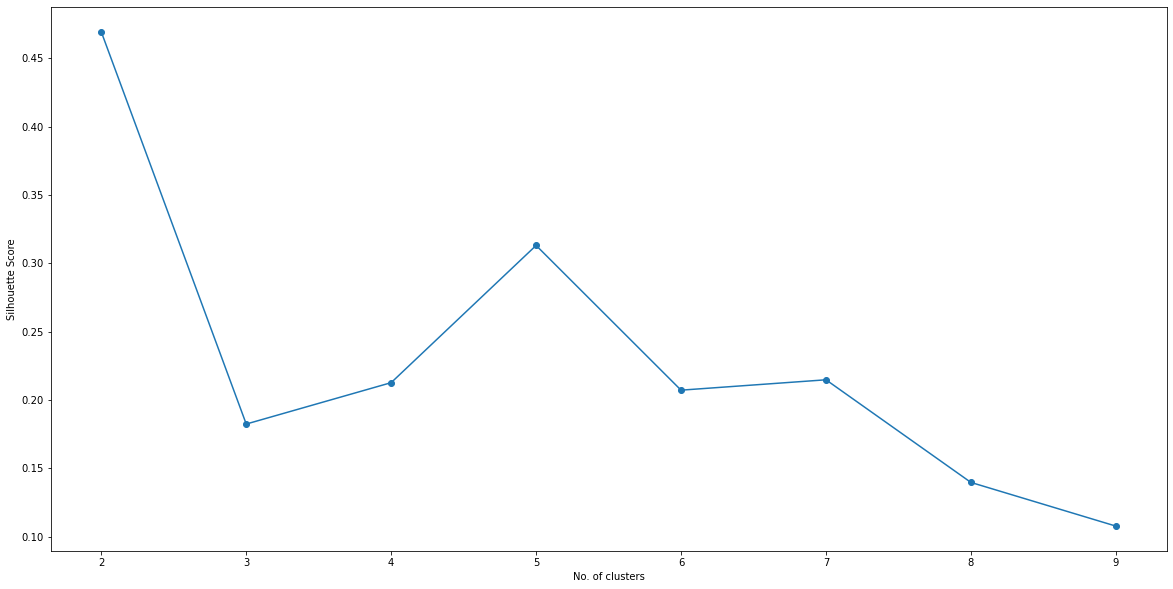

In [36]:
#plot the output so it can be seen graphically
plot(max_range, scores, "No. of clusters", "Silhouette Score")

**Note: While the optimal cluster group is 5, after doing the analysis, 5 clusters gives one large group and then 4 very small (2 neighborhoods or fewer) clusters, so decided on 6 clusters**

In [37]:
#while 5 is the highest, it's not the most interesting to break all these neighborhoods into 5 categories. Let's go with the next highest, 6.
kmeans = KMeans(n_clusters = 6, random_state=0).fit(arlington_cluster)
kmeans.labels_[0:10]

array([0, 1, 0, 0, 0, 0, 4, 1, 0, 0], dtype=int32)

In [38]:
#merge the average rent data into the venue frequency dataframe, so that rent can be seen next to the neighborhood
arlington_merge = arl_info

arlington_merge = arlington_merge.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

arlington_merge.insert(0, 'Cluster Labels', kmeans.labels_)
arlington_merge.head()

,Cluster Labels,Neighborhood,Average Rent,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,"Alcova Heights, Arlington, Virginia",1639.0,38.8646,-77.0972,Latin American Restaurant,Mexican Restaurant,Convenience Store,Fast Food Restaurant,Donut Shop,Thai Restaurant,Park,Gym,American Restaurant,Food Court
1,1,"Arlington Forest, Arlington, Virginia",1888.0,38.8689,-77.1131,Trail,Park,Thai Restaurant,Gym,Sandwich Place,Café,Cafeteria,Supermarket,Steakhouse,Pharmacy
2,0,"Arlington Heights, Arlington, Virginia",1639.0,38.8696,-77.0922,Pizza Place,Donut Shop,Thai Restaurant,Mexican Restaurant,Latin American Restaurant,Convenience Store,Video Store,Taco Place,Fast Food Restaurant,Grocery Store
3,0,"Arlington Mill, Arlington, Virginia",1639.0,38.8565,-77.1099,Gym,Convenience Store,Latin American Restaurant,Taco Place,Park,Pizza Place,Supermarket,Chinese Restaurant,Bank,Dog Run
4,0,"Arlington Ridge, Arlington, Virginia",2126.0,38.8904,-77.0842,Gym / Fitness Center,Food Truck,Hotel,Sandwich Place,Bakery,Middle Eastern Restaurant,Health & Beauty Service,Furniture / Home Store,Spa,Deli / Bodega


**Step 7: Plot the neighborhoods again, and color the neighborhood by cluster group**

In [39]:
# create map of the clusters
map_clusters = folium.Map(location=[latitude_arl, longitude_arl], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(arlington_merge['Latitude'], arlington_merge['Longitude'], arlington_merge['Neighborhood'], arlington_merge['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Step 8: Examine the clusters, and find the average rent for each cluster based on the intial dataset.**

In [40]:
#examine clusters

cluster_zero = arlington_merge.loc[arlington_merge['Cluster Labels'] == 0, arlington_merge.columns[[0, 1] + list(range(2, arlington_merge.shape[1]))]]
rent = cluster_zero["Average Rent"].mean()
print("The average rent in Cluster Zero is: $", round(rent, 0))
cluster_zero

The average rent in Cluster Zero is: $ 2012.0


,Cluster Labels,Neighborhood,Average Rent,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,"Alcova Heights, Arlington, Virginia",1639.0,38.8646,-77.0972,Latin American Restaurant,Mexican Restaurant,Convenience Store,Fast Food Restaurant,Donut Shop,Thai Restaurant,Park,Gym,American Restaurant,Food Court
2,0,"Arlington Heights, Arlington, Virginia",1639.0,38.8696,-77.0922,Pizza Place,Donut Shop,Thai Restaurant,Mexican Restaurant,Latin American Restaurant,Convenience Store,Video Store,Taco Place,Fast Food Restaurant,Grocery Store
3,0,"Arlington Mill, Arlington, Virginia",1639.0,38.8565,-77.1099,Gym,Convenience Store,Latin American Restaurant,Taco Place,Park,Pizza Place,Supermarket,Chinese Restaurant,Bank,Dog Run
4,0,"Arlington Ridge, Arlington, Virginia",2126.0,38.8904,-77.0842,Gym / Fitness Center,Food Truck,Hotel,Sandwich Place,Bakery,Middle Eastern Restaurant,Health & Beauty Service,Furniture / Home Store,Spa,Deli / Bodega
5,0,"Arlington View, Arlington, Virginia",1639.0,38.8631,-77.0726,Gym,Park,Clothing Store,Gym / Fitness Center,Grocery Store,Ethiopian Restaurant,Café,Smoke Shop,Shopping Mall,Memorial Site
8,0,"Ashton Heights, Arlington, Virginia",2160.0,38.8946,-77.0775,Coffee Shop,Hotel,Food Truck,Park,Gym / Fitness Center,Sandwich Place,Bar,Deli / Bodega,Mexican Restaurant,Grocery Store
9,0,"Aurora Highlands, Arlington, Virginia",2126.0,38.8982,-77.083,Gym / Fitness Center,Food Truck,Coffee Shop,Hotel,Bar,Sandwich Place,Park,Café,Convenience Store,Hookah Bar
10,0,"Ballston, Arlington, Virginia",2160.0,38.882,-77.1115,Coffee Shop,Café,Park,Gym,American Restaurant,Food Truck,Convenience Store,Mexican Restaurant,Deli / Bodega,Nail Salon
15,0,"Buckingham, Arlington, Virginia",2216.0,38.8734,-77.1066,Latin American Restaurant,Coffee Shop,Mexican Restaurant,American Restaurant,Pizza Place,Park,Mediterranean Restaurant,Gym,Skating Rink,Liquor Store
16,0,"Cardinal House, Arlington, Virginia",2124.0,38.8961,-77.0945,Coffee Shop,Gym / Fitness Center,Grocery Store,Burger Joint,Pizza Place,Pharmacy,Bakery,Furniture / Home Store,Shipping Store,Pet Store


In [41]:
cluster_one = arlington_merge.loc[arlington_merge['Cluster Labels'] == 1, arlington_merge.columns[[0, 1] + list(range(2, arlington_merge.shape[1]))]]
rent= cluster_one["Average Rent"].mean()
print("The average rent in Cluster One is: $", round(rent, 0))
cluster_one

The average rent in Cluster One is: $ 1848.0


,Cluster Labels,Neighborhood,Average Rent,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,1,"Arlington Forest, Arlington, Virginia",1888.0,38.8689,-77.1131,Trail,Park,Thai Restaurant,Gym,Sandwich Place,Café,Cafeteria,Supermarket,Steakhouse,Pharmacy
7,1,"Army Navy Country Club, Arlington, Virginia",1727.0,38.855,-77.0774,Food Truck,Park,Gym,Basketball Court,Trail,Soccer Field,Shopping Mall,Building,Golf Course,Chinese Restaurant
11,1,"Barcroft, Arlington, Virginia",1639.0,38.8559,-77.1039,Gym,Convenience Store,Latin American Restaurant,Park,Baseball Field,Trail,Food Truck,Pizza Place,Gym / Fitness Center,Supermarket
13,1,"Bluemont, Arlington, Virginia",2214.0,38.8747,-77.133,Trail,Park,Baseball Field,Pizza Place,Middle Eastern Restaurant,Moving Target,Gastropub,Spa,Mexican Restaurant,Convenience Store
23,1,"Columbia Heights, Arlington, Virginia",1639.0,38.8576,-77.1211,Trail,Department Store,Grocery Store,Video Store,Furniture / Home Store,Fried Chicken Joint,Clothing Store,Sporting Goods Shop,Convenience Store,Park
27,1,"Dominion Hills, Arlington, Virginia",1769.0,38.8759,-77.1411,Park,Chinese Restaurant,Trail,Coffee Shop,Baseball Field,Bank,Pizza Place,Massage Studio,Shopping Mall,Big Box Store
29,1,"Douglas Park, Arlington, Virginia",1639.0,38.8531,-77.0973,Convenience Store,Mexican Restaurant,Baseball Field,Trail,Gym,Food Truck,Latin American Restaurant,Fast Food Restaurant,Park,Soccer Field
31,1,"East Falls Church, Arlington, Virginia",2242.0,38.886,-77.1568,Trail,Park,Playground,Rental Car Location,Soccer Field,Coffee Shop,Baseball Field,Sushi Restaurant,Sports Bar,Mediterranean Restaurant
37,1,"Glencarlyn, Arlington, Virginia",1639.0,38.8618,-77.1291,Trail,Clothing Store,Grocery Store,Sandwich Place,Bus Station,Paper / Office Supplies Store,Park,Latin American Restaurant,Arts & Crafts Store,Shopping Mall
40,1,"Highland Park, Arlington, Virginia",1769.0,38.8859,-77.1464,Park,Trail,Thrift / Vintage Store,Bakery,Gift Shop,Bar,Record Shop,Basketball Court,Beer Garden,Rental Car Location


In [42]:
cluster_two = arlington_merge.loc[arlington_merge['Cluster Labels'] == 2, arlington_merge.columns[[0, 1] + list(range(2, arlington_merge.shape[1]))]]
rent= cluster_two["Average Rent"].mean()
print("The average rent in Cluster Two is: $", round(rent, 0))
cluster_two

The average rent in Cluster Two is: $ 2087.0


,Cluster Labels,Neighborhood,Average Rent,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,2,"Bellevue Forest, Arlington, Virginia",2087.0,38.9143,-77.1136,Park,Scenic Lookout,Trail,Home Service,Pool,Flower Shop,Flea Market,Filipino Restaurant,Fondue Restaurant,Food Court
28,2,"Donaldson Run, Arlington, Virginia",2087.0,38.9149,-77.1105,Park,Trail,Scenic Lookout,Pool,Home Service,Lawyer,Food Truck,Disc Golf,Eastern European Restaurant,Food Court
55,2,"Potomac Overlook Regional Park, Arlington, Vir...",2087.0,38.914,-77.1097,Park,Trail,Scenic Lookout,Pool,Home Service,Lawyer,Food Truck,Disc Golf,Eastern European Restaurant,Food Court


In [43]:
cluster_three = arlington_merge.loc[arlington_merge['Cluster Labels'] == 3, arlington_merge.columns[[0, 1] + list(range(2, arlington_merge.shape[1]))]]
rent= cluster_three["Average Rent"].mean()
print("The average rent in Cluster Three is: $", round(rent, 0))
cluster_three

The average rent in Cluster Three is: $ 2087.0


,Cluster Labels,Neighborhood,Average Rent,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
58,3,"Rock Spring, Arlington, Virginia",2087.0,38.9108,-77.1235,Golf Course,Lawyer,Home Service,Park,Yoga Studio,Ethiopian Restaurant,French Restaurant,Food Truck,Food Court,Fondue Restaurant


In [44]:
cluster_four = arlington_merge.loc[arlington_merge['Cluster Labels'] == 4, arlington_merge.columns[[0, 1] + list(range(2, arlington_merge.shape[1]))]]
rent= cluster_four["Average Rent"].mean()
print("The average rent in Cluster Four is: $", round(rent, 0))
cluster_four

The average rent in Cluster Four is: $ 2087.0


,Cluster Labels,Neighborhood,Average Rent,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,4,"Arlingwood, Arlington, Virginia",2087.0,38.9276,-77.1219,Historic Site,Trail,Park,Dog Run,Yoga Studio,Eye Doctor,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market
17,4,"Chainbridge Forest, Arlington, Virginia",2087.0,38.9241,-77.1221,Park,Home Service,Locksmith,Trail,Historic Site,Dog Run,Eye Doctor,Farmers Market,Fast Food Restaurant,Yoga Studio
38,4,"Gulf Branch, Arlington, Virginia",2087.0,38.9212,-77.1172,Park,Trail,Home Service,Scenic Lookout,Historic Site,Intersection,Dog Run,Flower Shop,Flea Market,Filipino Restaurant
56,4,"Rivercrest, Arlington, Virginia",2087.0,38.9221,-77.1191,Park,Trail,Home Service,Dog Run,Historic Site,Scenic Lookout,Flea Market,Filipino Restaurant,Fast Food Restaurant,Flower Shop


In [45]:
cluster_five = arlington_merge.loc[arlington_merge['Cluster Labels'] == 5, arlington_merge.columns[[0, 1] + list(range(2, arlington_merge.shape[1]))]]
rent= cluster_five["Average Rent"].mean()
print("The average rent in Cluster Five is: $", round(rent, 0))
cluster_five

The average rent in Cluster Five is: $ 2087.0


,Cluster Labels,Neighborhood,Average Rent,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,5,"Dover - Crystal, Arlington, Virginia",2087.0,38.9068,-77.1058,Park,Pool,Food Truck,Gym / Fitness Center,Frozen Yogurt Shop,French Restaurant,Food Court,Fondue Restaurant,Flower Shop,Flea Market
57,5,"Riverwood, Arlington, Virginia",2087.0,38.9054,-77.1025,Park,Pool,Pet Store,Massage Studio,Chinese Restaurant,Trail,Gym / Fitness Center,Food Truck,Pizza Place,Department Store


**Conclusion and Discussion**

Cluster Zero is the largets of the clusters, and has an average rent of $2,012 per month. This cluster has a wide diversity of nearby venues including parks, theaters, gyms, and restuarants. If someone were moving to Arlington and wanted to make sure that the lived within walking distance of entertainment or amenities, they should start their search in neighborhoods from cluster zero.

Cluster one is the second largest, and has an average rent of $1,848 per month. This cluster has some diversity, but a large number of the top nearby venues are parks and trails, but with some options of other amenities like stores and restaurants. If someone wanted to live in Alrington at a slightly cheaper rate and liked being near outdoor venues, cluster one neighborhoods would be the best option.

Cluster two, three, four, and five are all very small (fewer than four venues per cluster) and all actually have the same average rent of $2,087 per month. As small clusters, they dont have too much diversity, but the most common nerby venue for most neighborhoods in these clusters is parks. If someone didn't like cluster Zero or One neighborhoods, they could look at these neighborhoods.

Where someone decides to live is based both on personal preference and cost of living. Through this analysis, a potential future Arlington resident could get an understanding of neighborhoods without ever having visited the city. Future analysis could look further clustering neighborhoods with cost of living as an input, or look at the cost of buying a house vs renting, but these were outside the scope of this project.